# Parkison Disease Using Ensemble Techniques

Parkinson’s disease (PD) is a neurodegenerative disorder that affects predominately dopamine-producing neurons in a specific area of the brain called substantia nigra.

Symptoms generally develop slowly over years. The progression of symptoms is often a bit different from one person to another due to the diversity of the disease. People with PD may experience:

Tremor, mainly at rest and described as pill rolling tremor in hands. Other forms of tremor are possible
Slowness of movements (bradykinesia)
Limb rigidity
Gait and balance problems

Import libraries

In [1]:

import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Tuning libraries

from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score



### 1. Load the dataset

In [4]:
df_p = pd.read_csv('parkinsons.data', sep=',',header=0)
df_p.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Shape of dataset

In [5]:
print("Shape of Dateset: ",df_p.shape,'\n')

Shape of Dateset:  (195, 24) 



columns of dataset

In [7]:
print("Dataset's columns: ",df_p.columns,'\n')


Dataset's columns:  Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object') 



Datatypes of columns

In [8]:
print("Column's datatypes: ",df_p.dtypes,'\n')

Column's datatypes:  name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object 



# We should have some idea about the features. Let’s have a look.

We should have some idea about the features. Let’s have a look.

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson’s, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

In [12]:
num_nulls = df_p.isnull().sum().sum()
print(num_nulls)

0


In [13]:
ndf = pd.DataFrame(columns=['1','2','3'])
for i in range(5):
    ndf.loc[i] = None; 
print(ndf)
num_nulls1 = ndf.isnull().sum().sum()
print("Number of nulls in dataframe:",num_nulls1)

     1    2    3
0  NaN  NaN  NaN
1  NaN  NaN  NaN
2  NaN  NaN  NaN
3  NaN  NaN  NaN
4  NaN  NaN  NaN
Number of nulls in dataframe: 15


In [14]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

# Statistical Analysis of Dataset

In [15]:
df_p.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


## 3.  Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? 

####  1. Univariate: To plot the graph of all features other than Name, as it is a Object type

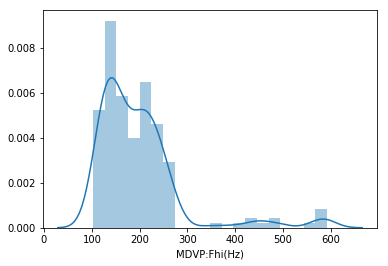

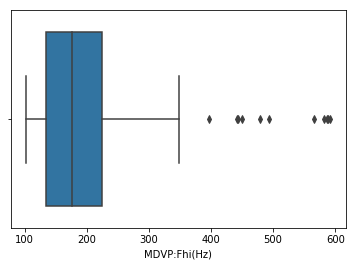

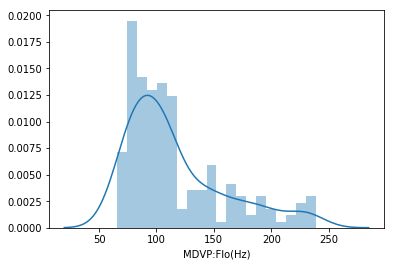

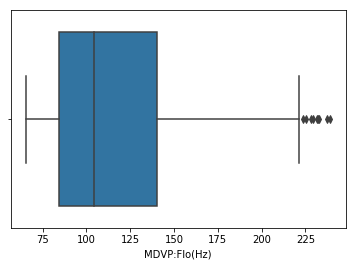

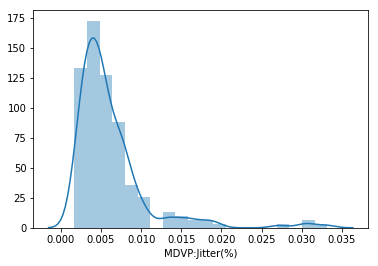

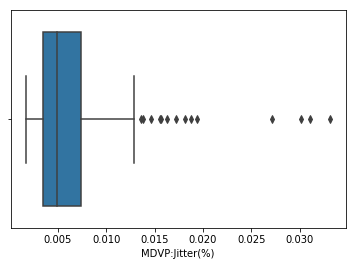

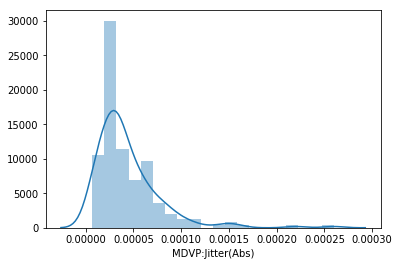

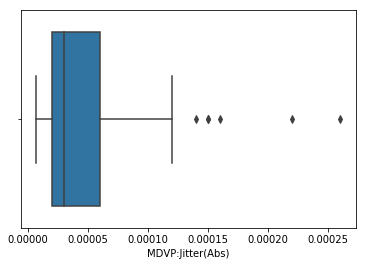

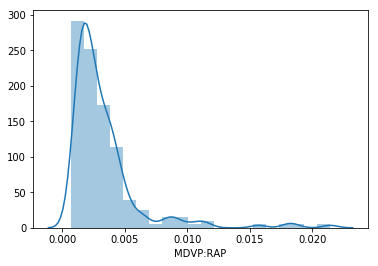

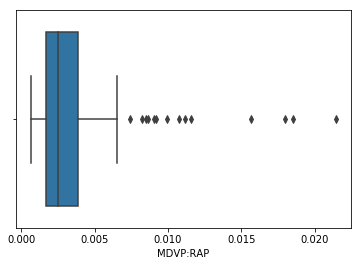

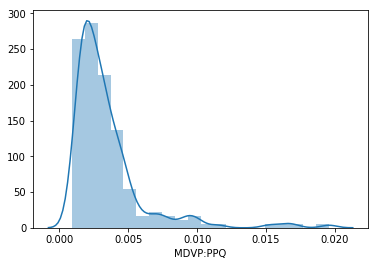

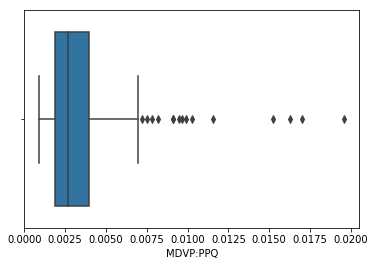

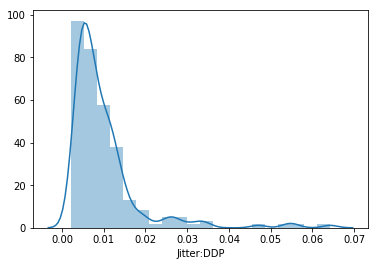

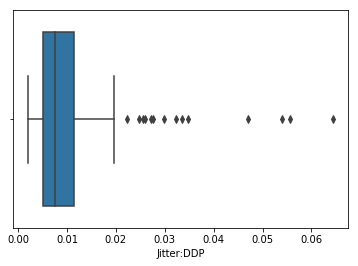

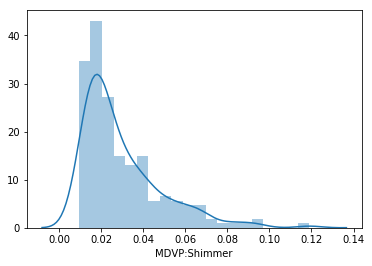

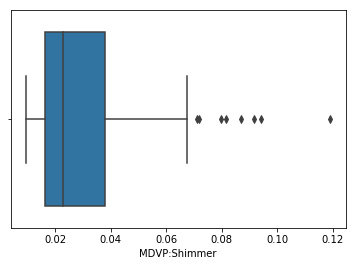

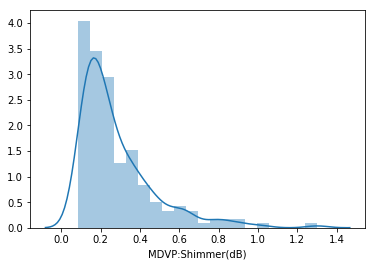

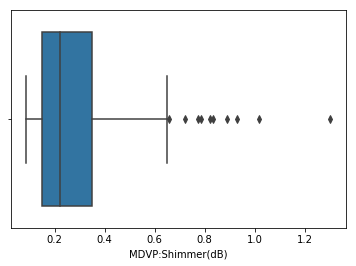

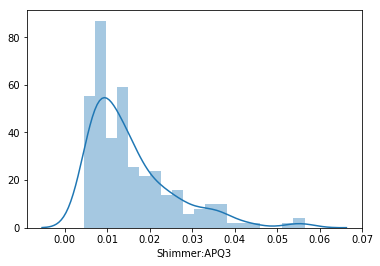

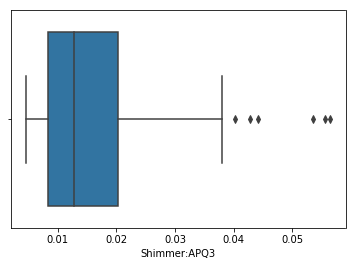

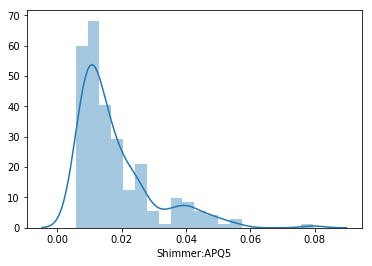

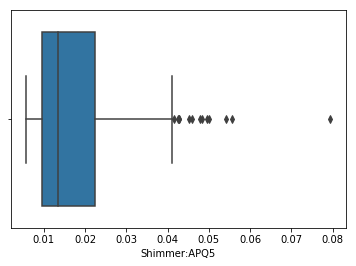

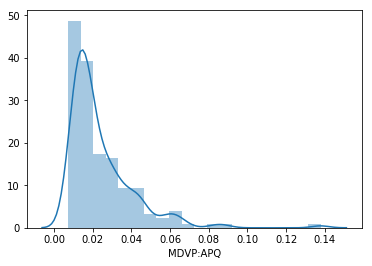

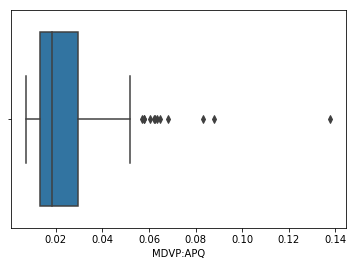

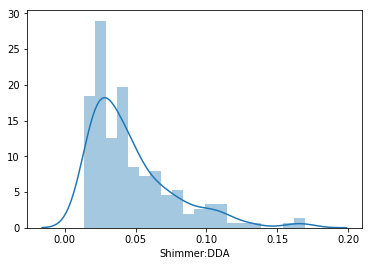

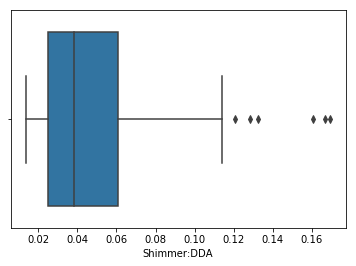

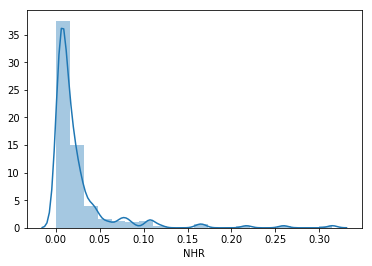

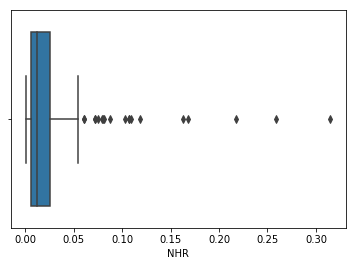

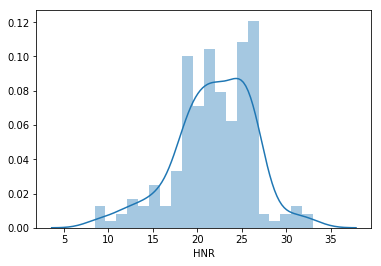

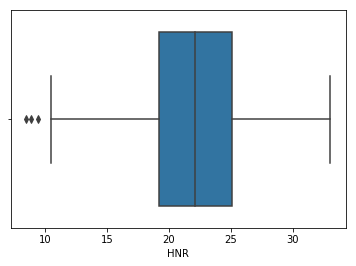

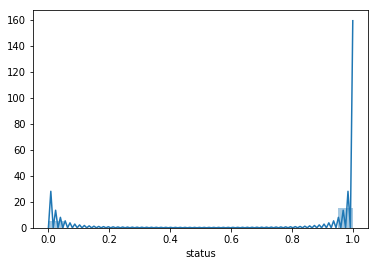

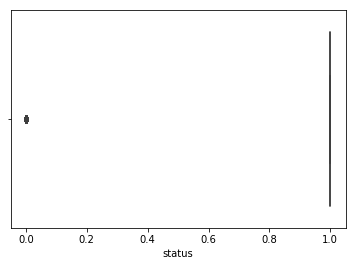

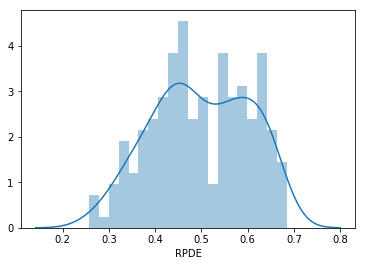

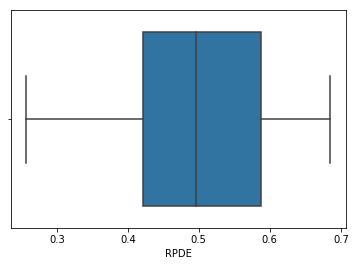

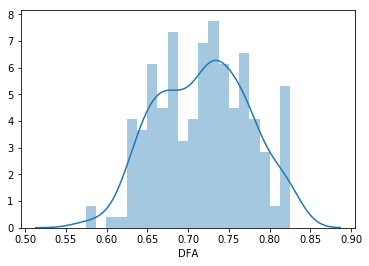

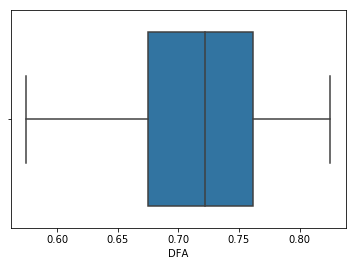

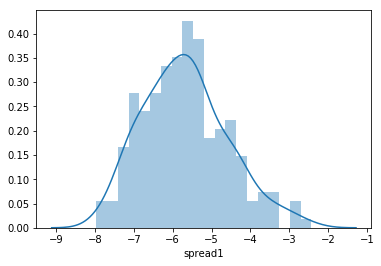

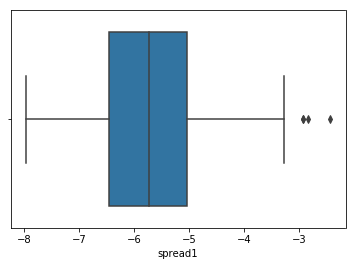

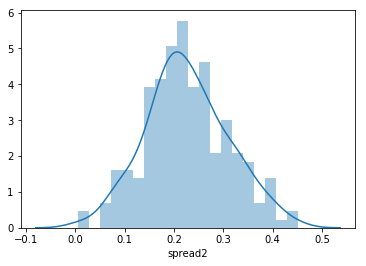

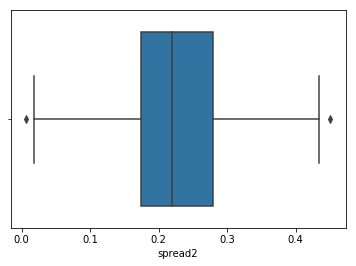

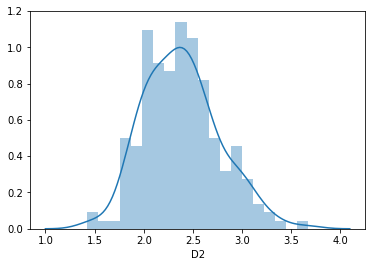

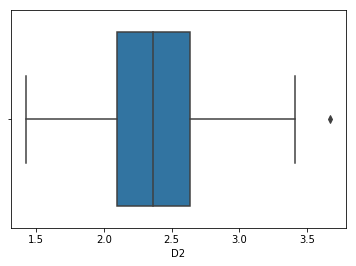

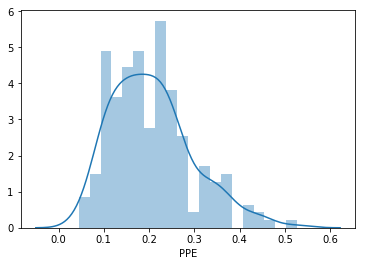

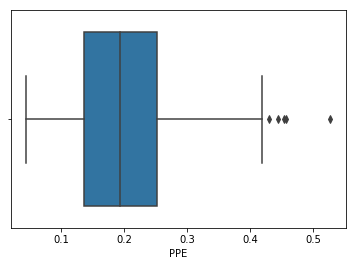

In [17]:


df_p= df_p.iloc[:, 1:]


for column in df_p:

    sns.distplot(df_p[column], bins=20)
    
    plt.show()

    sns.boxplot(df_p[column])
    
    plt.show()

#### 2. Bivariate Analysis

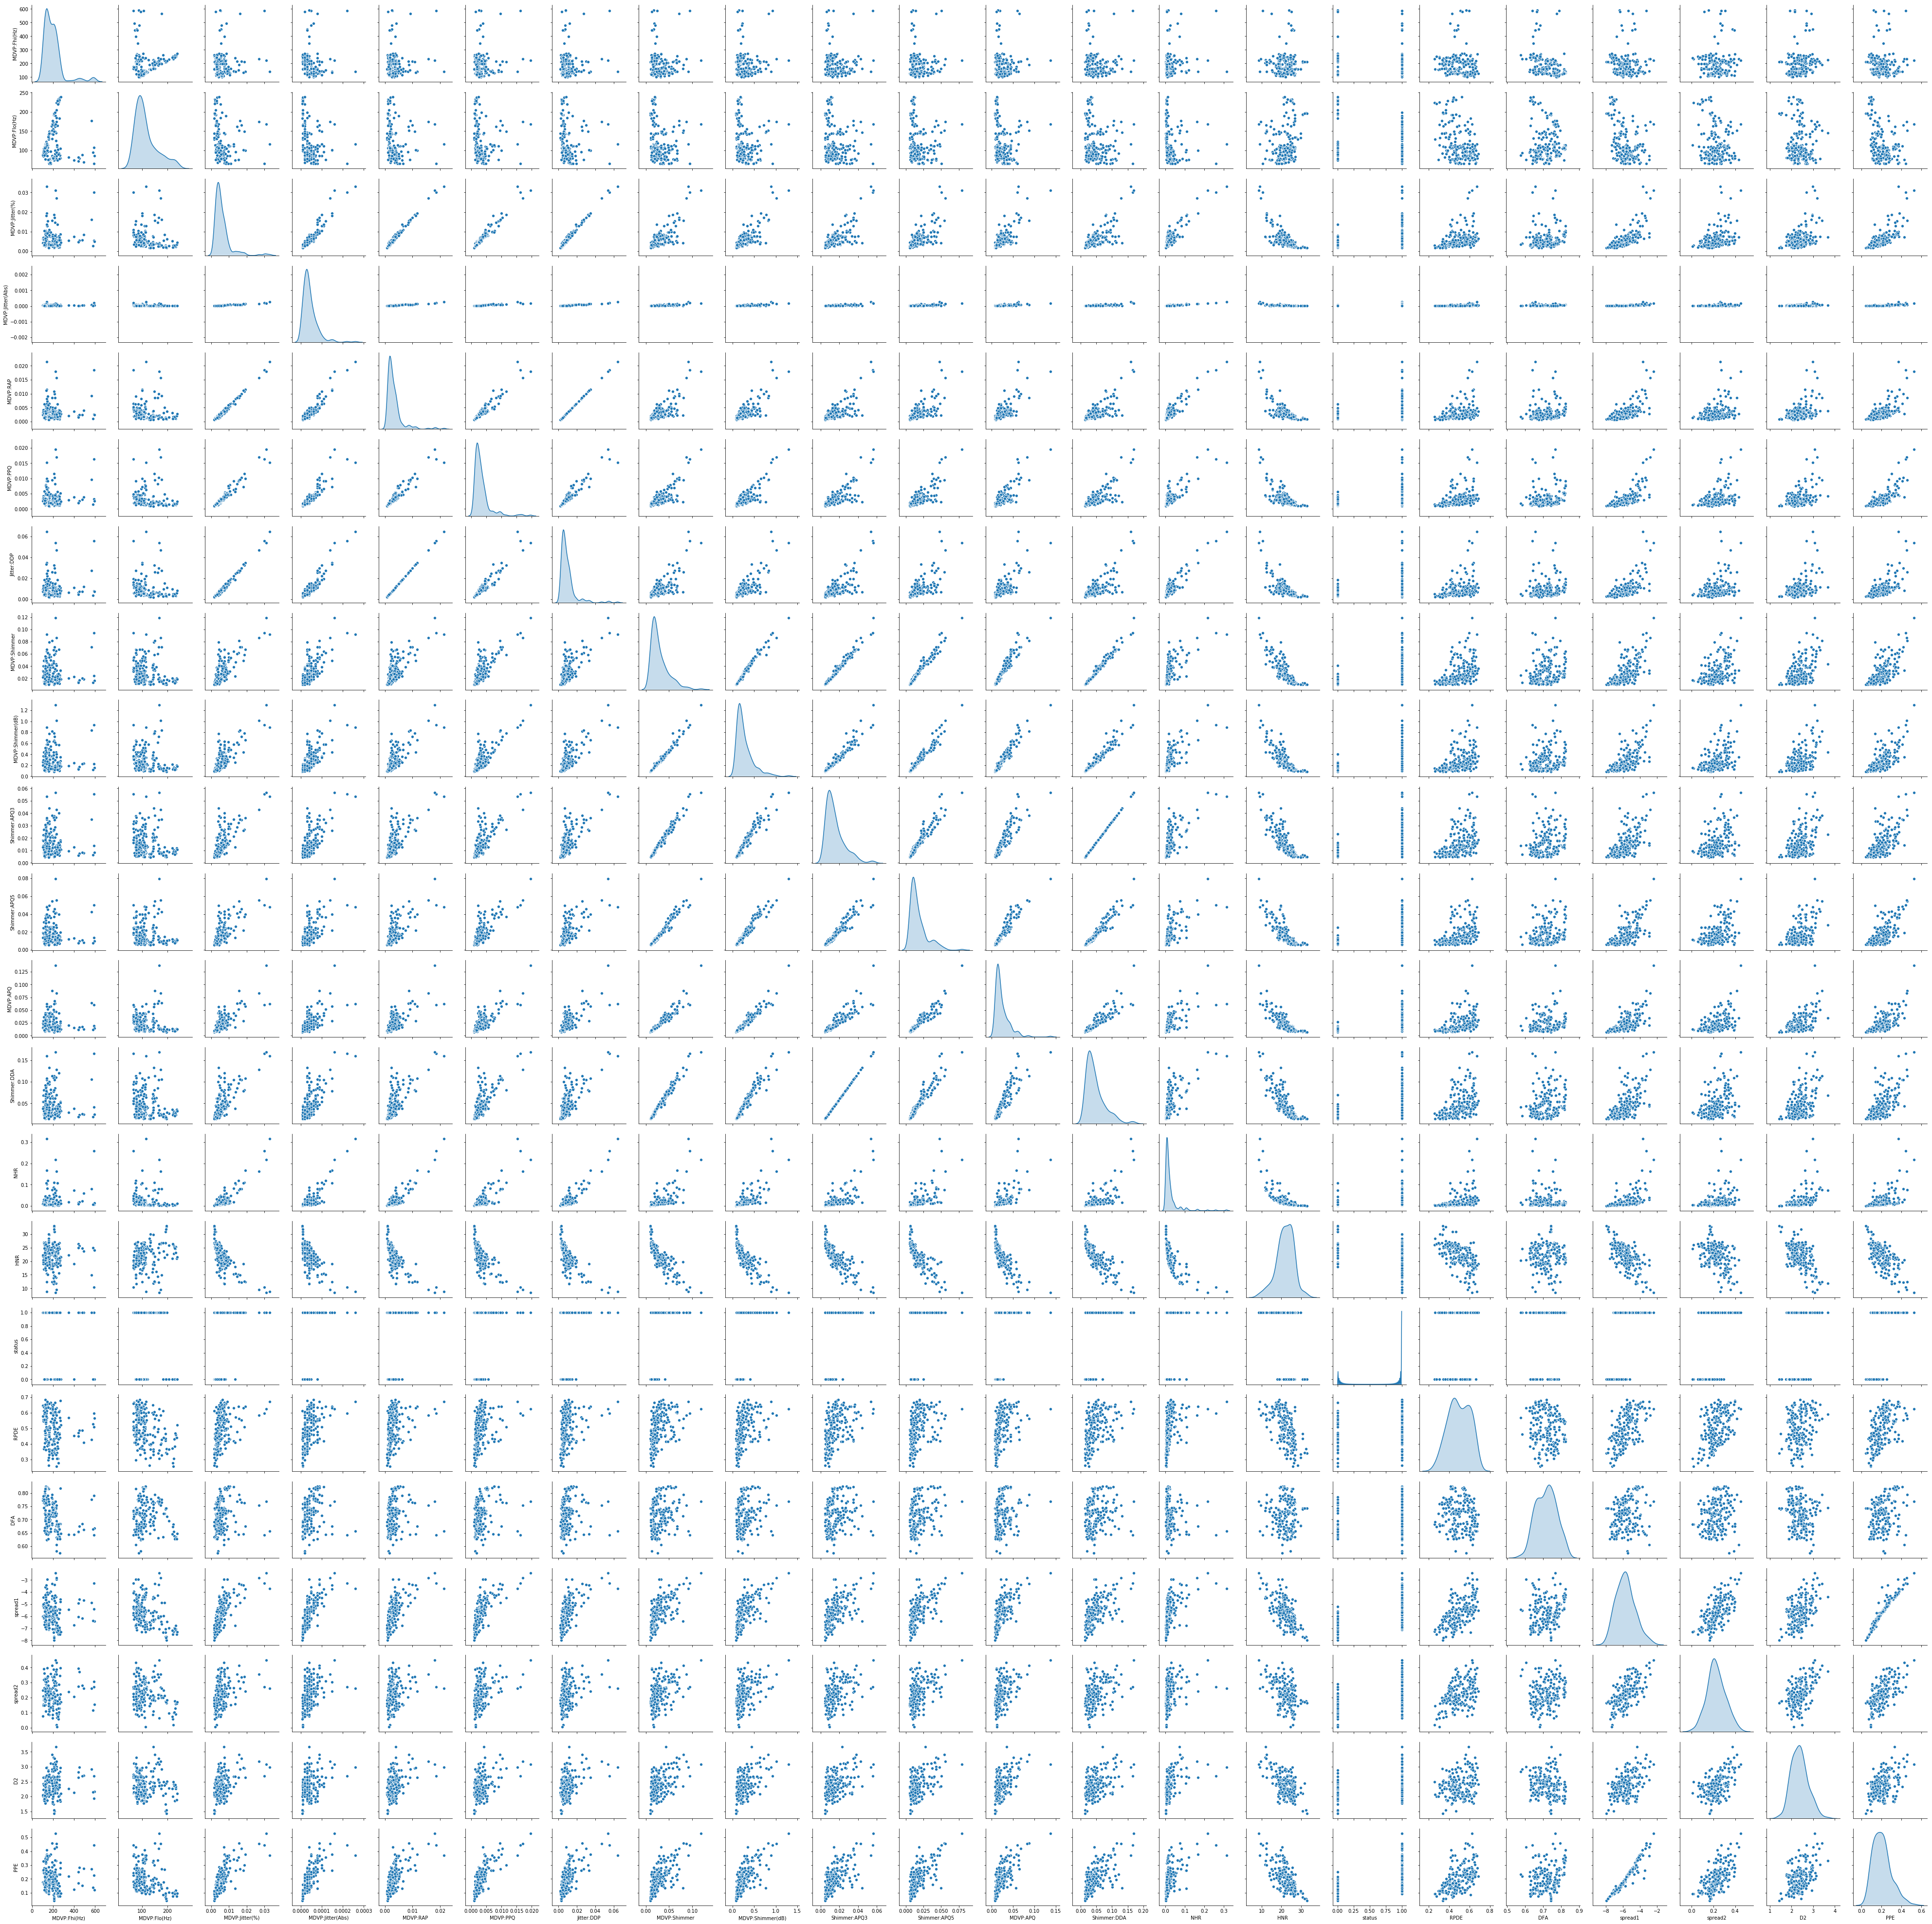

In [18]:

sns.pairplot(df_p, diag_kind='kde')

#### Bivariate: Plotting the graphs of all the features

In [19]:
for i in X.columns:
    
    df_p.groupby(i)['status'].value_counts().unstack().plot(kind = 'bar', stacked = True, figsize = (10,8))

NameError: name 'X' is not defined

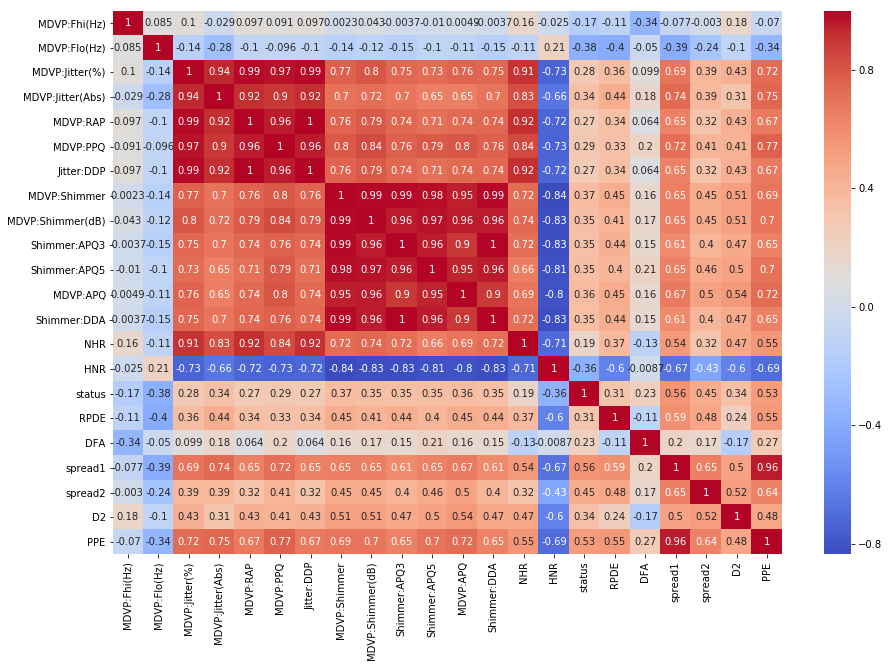

In [21]:
corr = df_p.corr()
fig = plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = "coolwarm")

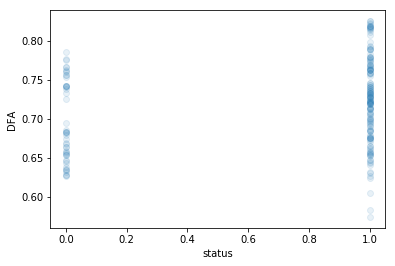

In [23]:
sns.regplot(data = df_p, x = 'status', y = 'DFA', fit_reg = False, scatter_kws = {'alpha' : 0.1});


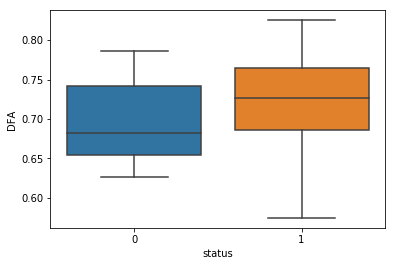

In [28]:
sns.boxplot(data=df_p,x = 'status', y = 'DFA');

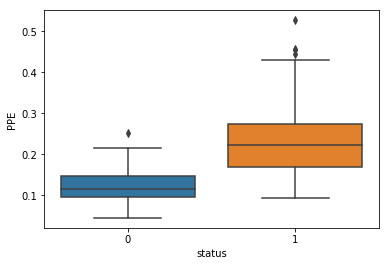

In [29]:
sns.boxplot(data=df_p,x = 'status', y = 'PPE');

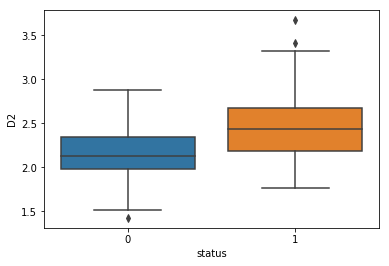

In [30]:
sns.boxplot(data=df_p,x = 'status', y = 'D2');

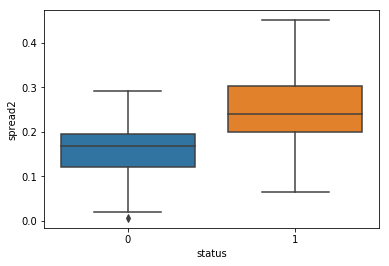

In [31]:
sns.boxplot(data=df_p,x = 'status', y = 'spread2');

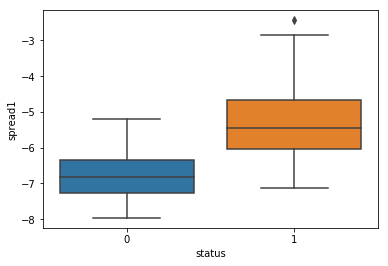

In [32]:
sns.boxplot(data=df_p,x = 'status', y = 'spread1');

In [33]:
# Correlation between dependent variable and independent variables 
corr.status

MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

#### From above result we can concluse that Spread1 has the strongest correlation with Status. PPE, Spread2, MDVP:Shimmer, MDVP:APQ also has a good correlation.


### 4. Split the dataset into training and test set in the ratio of 70:30

In [34]:

X= df_p.iloc[:,1:]
y = df_p["status"]
  
# Spliting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) 
      
print( X, y, X_train, X_test, y_train, y_test) 

     MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  \
0          74.997         0.00784           0.00007   0.00370   0.00554   
1         113.819         0.00968           0.00008   0.00465   0.00696   
2         111.555         0.01050           0.00009   0.00544   0.00781   
3         111.366         0.00997           0.00009   0.00502   0.00698   
4         110.655         0.01284           0.00011   0.00655   0.00908   
5         113.787         0.00968           0.00008   0.00463   0.00750   
6         114.820         0.00333           0.00003   0.00155   0.00202   
7         104.315         0.00290           0.00003   0.00144   0.00182   
8          91.754         0.00551           0.00006   0.00293   0.00332   
9          91.226         0.00532           0.00006   0.00268   0.00332   
10         84.072         0.00505           0.00006   0.00254   0.00330   
11         86.292         0.00540           0.00006   0.00281   0.00336   
12        131.276        

###  5. Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [35]:
# Importing the required libraries and packages 

In [36]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


In [37]:
# Create Decision Tree classifer object using entropy
clftree = DecisionTreeClassifier(criterion= 'entropy')

# Fit the classifier to train data
clftree = clftree.fit(X_train,y_train)



### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.

In [38]:
print("Score:",clftree.score(X_test,y_test))

Score: 1.0


In [39]:
# Predict the values?
y_pred = clftree.predict(X_test) 
print("Predicted values:", y_pred) 

Predicted values: [1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [40]:
from sklearn.metrics import confusion_matrix    

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
      


Confusion Matrix:  [[12  0]
 [ 0 47]]


In [41]:
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100,"%")  


Accuracy :  100.0 %


In [42]:
print("Report : ",  classification_report(y_test, y_pred)) 

Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



#### Based on the heatmap plotted above, it is noticed that column DFA, D2, Spread1, Spread2 and PPE is highly dependent on Status (Independent Variable). Hence the cross tab is performed on DFA

In [43]:
# Crosstab between Status(Dependent) and DFA(Independent)
pd.crosstab(df_p.status, df_p.DFA, margins=True)

DFA,0.574282,0.5827100000000001,0.605417,0.623731,0.62671,0.627337,0.628058,0.628232,0.630409,0.631653,...,0.817396,0.817756,0.819032,0.819235,0.8195209999999999,0.821364,0.823484,0.825069,0.8252879999999999,All
status,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,48
1,1,1,1,1,0,1,0,0,1,0,...,1,1,1,1,1,1,1,1,1,147
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,195


In [44]:
# Crosstab between Status(Dependent) and PPE(Independent)
pd.crosstab(df_p.status, df_p.PPE, margins=True)

PPE,0.044538999999999995,0.056140999999999996,0.05761,0.06850099999999999,0.073581,0.075587,0.085569,0.086398,0.09147000000000001,0.091546,...,0.377429,0.378483,0.41033500000000006,0.418646,0.430788,0.444774,0.454721,0.45753299999999997,0.527367,All
status,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,48
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,147
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,195


In [45]:
# Crosstab between Status(Dependent) and D2(Independent)
pd.crosstab(df_p.status, df_p.D2, margins=True)

D2,1.4232870000000002,1.512275,1.5446090000000001,1.7438669999999998,1.765957,1.7779009999999997,1.8212970000000002,1.8270119999999999,1.831691,1.840198,...,3.0993009999999996,3.10901,3.13655,3.142364,3.184027,3.274865,3.317586,3.413649,3.671155,All
status,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,48
1,0,0,0,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,147
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,195


In [46]:
# Crosstab between Status(Dependent) and spread1(Independent)
pd.crosstab(df_p.status, df_p.spread1, margins=True)

spread1,-7.964983999999999,-7.777685000000001,-7.695734,-7.682587,-7.5179339999999995,-7.496264,-7.3483,-7.31951,-7.314236999999999,-7.31055,...,-3.5837220000000003,-3.4444779999999997,-3.377325,-3.297668,-3.269487,-2.93107,-2.929379,-2.839756,-2.434031,All
status,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,48
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,147
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,195


In [67]:
# Crosstab between Status(Dependent) and spread2(Independent)
pd.crosstab(df_p.status, df_p.spread2, margins=True)

spread2,0.006274,0.018688999999999997,0.056844000000000006,0.063412,0.06699400000000001,0.073298,0.078202,0.086372,0.08716499999999999,0.08784,...,0.389232,0.389295,0.391002,0.393056,0.396746,0.39774899999999996,0.414758,0.43432600000000005,0.45049300000000003,All
status,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,48
1,0,0,0,1,0,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,147
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,195


### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [68]:
# Decision tree with entropy using max_depth=2 and min_sample leaf = 4
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 2, min_samples_leaf = 3) 
  
    # Performing training 
clf_entropy.fit(X_train, y_train) 
clf_entropy 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [69]:
 # Predicton on test with entropy 
y_pred1 = clf_entropy.predict(X_test) 
print("Predicted values:") 
print(y_pred1) 


Predicted values:
[1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [70]:
print ("Accuracy of Entropy Model 1 : ", accuracy_score(y_test,y_pred1)*100,"%")  

Accuracy of Entropy Model 1 :  100.0 %


In [71]:
# Decision tree with entropy using max_depth=3 and min_sample leaf = 5
clf_entropy1 = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
clf_entropy1.fit(X_train, y_train) 
clf_entropy1 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [72]:
 # Predicton on test with entropy 
y_pred2 = clf_entropy1.predict(X_test) 
print("Predicted values:") 
print(y_pred2) 

Predicted values:
[1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [73]:
print ("Accuracy of Entropy Model 2 : ", accuracy_score(y_test,y_pred2)*100,"%")  

Accuracy of Entropy Model 2 :  100.0 %


In [74]:
# Decision tree with entropy using max_depth=6 and min_sample leaf = 9
clf_entropy2 = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 4, min_samples_leaf = 6) 
  
    # Performing training 
clf_entropy2.fit(X_train, y_train) 
clf_entropy2 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [75]:
 # Predicton on test with entropy 
y_pred3 = clf_entropy1.predict(X_test) 
print("Predicted values:") 
print(y_pred3) 

Predicted values:
[1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [76]:
print ("Accuracy of Entropy Model 3 : ", accuracy_score(y_test,y_pred2)*100,"%")  

Accuracy of Entropy Model 3 :  100.0 %


By predicting the model for two types of Entropy it has been analysed that by increasing the depth and the leaf the model accuracy reduces. 

It is also being analysed that by incresing the depth and leaf beyond the point of 3 and 5 accordingly, there is no change in the accuracy.

In [77]:
from sklearn.metrics import confusion_matrix    

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
      
print("Report : ",  classification_report(y_test, y_pred)) 

Confusion Matrix:  [[12  0]
 [ 0 47]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [78]:
from sklearn import tree 
from sklearn.tree import export_graphviz
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

# export_graphviz(clf_entropy2, 
#                 out_file='DOT-files1/tree1.dot', 
#                 feature_names=X)

In [79]:

# from IPython.display import Image
# Image(filename='tree.png')

In [80]:

# from sklearn.externals.six import StringIO  
# import pydot 
# dot_data = StringIO() 
# tree.export_graphviz(clf_entropy, out_file=dot_data) 
# graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
# graph.write_pdf("tree.pdf") 

In [96]:
with open("clftree.dot", "w") as f:
    f = tree.export_graphviz(clftree, out_file=f)


In [97]:

# converting into the pdf file
with open("clftree.dot", "w") as f:
    f = tree.export_graphviz(clftree, out_file=f)

In [98]:
system("dot -Tpng D:\clftree.dot -o D:/clftree.png")
Image("d:\clftree.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator_limited, 
                out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

### 8.  Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [87]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

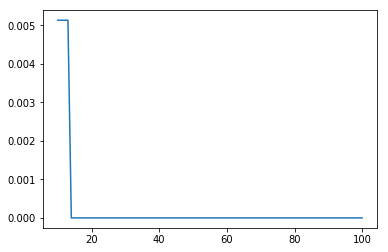

In [88]:
# Code to estimate the optimal number of trees
ensemble_clfs = [ ("RandomForestClassifier, max_features=None",RandomForestClassifier(warm_start=True, max_features=None, oob_score=True,))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 10
max_estimators = 100
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

With the graph it is analysed that the optimal number of trees to be used is 15

In [89]:
# Creating a Random Forest model with 10 trees

# Fitting Random Forest Classification to training set

rfcl = RandomForestClassifier(n_estimators = 15)
rfcl = rfcl.fit(X_train, y_train) 

In [90]:
# Predicting the test Set
y_predict = rfcl.predict(X_test)
y_predict

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [91]:
print("Score:",rfcl.score(X_test,y_test))

Score: 0.9661016949152542


In [92]:
print ("Accuracy : ", accuracy_score(y_test,y_predict)*100) 

Accuracy :  96.61016949152543


In [93]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 

Confusion Matrix:  [[12  0]
 [ 0 47]]
